#Polynomial

##Implementation

In [ ]:
import cvxpy as cp
import numpy as np
from matplotlib import pyplot as plt

### Some Functions

In [ ]:
# g(x) = x**n - (sigma i from 0 to n-1)x**i
def g(xk, n, A):
    curr_val = xk**n
    for i in range(n):
        curr_val -= A[i] * (xk**i)
    return curr_val


def objective1(n, N, x, A):
    sum_of_all = 0

    for k in range(-N, N+1):
        sum_of_all += ( g(x(k), n, A) ** 2 )
    
    return sum_of_all


def objective2(n, N, x, A):
    sum_of_all = 0

    for k in range(-N, N+1):
        val = g(x(k), n, A)
        sum_of_all += cp.abs(val)
    
    return sum_of_all

### Main Function
The main function to calculate co efficients given n and objective function

In [ ]:
# This is the main function that runs for different n

ns_to_calc = [5, 10, 15, 20]

def func(n: int, problem=1, print_values=True):
    N = max(50, 10*n)

    x = lambda k: k/N

    objective = None
    if (problem == 1):
        objective = objective1
    else:
        objective = objective2
            
    A = cp.Variable(n)
    
    cost = cp.Minimize(objective(n, N, x, A))
    constraints = []

    prob = cp.Problem(cost, constraints)
    prob.solve()

    min_cost = objective(n, N, x, A.value)
    if (problem != 1):
        min_cost = min_cost.value.tolist()

    if print_values:
        print ("A", A.value)
        print ("Cost", min_cost)
        print ("\n")

    return A.value, min_cost

###Calculation


In [ ]:
data1 = {}

print ("Problem 1 \n\n")
for n in ns_to_calc:
    print ("n =", n)
    data1[n] = func(n, 1)

print ("\n\n")

data2 = {}

print ("Problem 2 \n\n")
for n in ns_to_calc:
    print ("n =", n)
    data2[n] = func(n, 2)

Problem 1 


n = 5
A [-1.09631427e-17 -2.47390507e-01  1.15955177e-16  1.13266667e+00
 -1.15380895e-16]
Cost 0.16266634234626057


n = 10
A [ 1.42786660e-03  7.15545038e-17 -7.78219252e-02 -7.63837179e-16
  6.68330583e-01  1.94401682e-15 -1.98671456e+00 -1.34306356e-15
  2.39036842e+00 -1.49848364e-17]
Cost 0.00032177984586499297


n = 15
A [-2.89952990e-12  6.91425068e-04  2.95130726e-10 -2.72681812e-02
 -4.88841442e-09  3.09057963e-01  3.02850574e-08 -1.53632271e+00
 -8.91431407e-08  3.90331743e+00  1.34417123e-07 -5.29166227e+00
 -1.00315929e-07  3.64203839e+00  2.93610445e-08]
Cost 4.722713232210493e-07


n = 20
A [ 3.86392864e-07  5.59898295e-11 -2.98122590e-04 -2.83142784e-09
  1.20092855e-02  4.03336344e-08 -1.46314017e-01 -2.51782476e-07
  7.74827646e-01  8.11866166e-07 -1.96278284e+00 -1.42430270e-06
  1.99937675e+00  1.29676514e-06  9.12068448e-01 -4.42068734e-07
 -4.04480662e+00 -1.18751208e-07  3.45587545e+00  9.07263475e-08]
Cost 2.738388230177021e-08





Problem 2 


n =

###Problem 1 Graphs

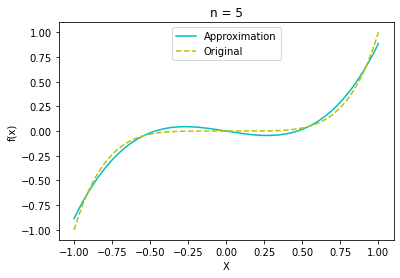

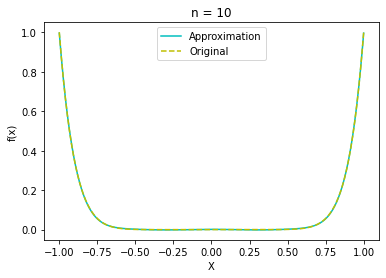

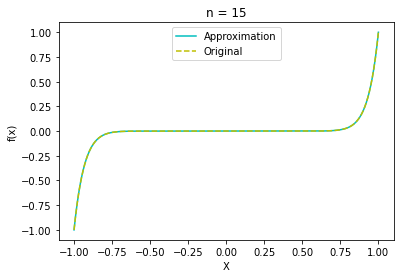

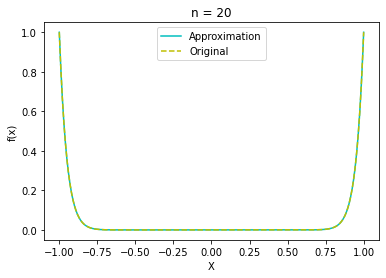

In [ ]:
# This is f(x) of the approximation
def y(x, coefs):
    s = 0
    po = 1
    for coef in coefs:
        s += coef * po
        po *= x
    return s


# Plotting n = 5, 10, 15, 20
for n in ns_to_calc:

    coefs, cost = data1[n]

    N = max(300, 10 * n)

    X = [k/N for k in range(-N, N+1)]

    Y = [y(x, coefs) for x in X]
    Z = [x ** n for x in X]

    plt.plot(X, Y, color="c", linestyle='-', label="Approximation")
    plt.plot(X, Z, color="y", linestyle='--', label="Original")
    plt.legend(loc="upper center")
    plt.title(f"n = {n}")
    plt.xlabel("X")
    plt.ylabel("f(x)")

    plt.show()

    print()


Finished Executing for n = 1
Finished Executing for n = 2
Finished Executing for n = 3
Finished Executing for n = 4
Finished Executing for n = 5
Finished Executing for n = 6
Finished Executing for n = 7
Finished Executing for n = 8
Finished Executing for n = 9
Finished Executing for n = 10
Finished Executing for n = 11
Finished Executing for n = 12
Finished Executing for n = 13
Finished Executing for n = 14
Finished Executing for n = 15
Finished Executing for n = 16
Finished Executing for n = 17
Finished Executing for n = 18
Finished Executing for n = 19
Finished Executing for n = 20


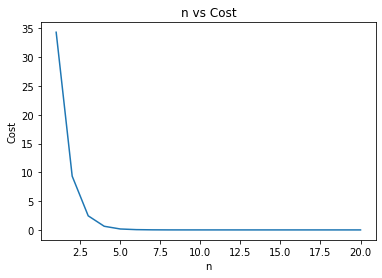

In [ ]:
# Calculating costs for different n and plotting

n_list = []
costs = []

for n in range(1, 21):
    coefs, cost = func(n, 1, False)
    print ("Finished Executing for n =", n)
    n_list.append(n)
    costs.append(cost)

plt.title("n vs Cost")
plt.plot(n_list, costs, '-')
plt.xlabel("n")
plt.ylabel("Cost")
plt.show()

###Problem 2 Graphs


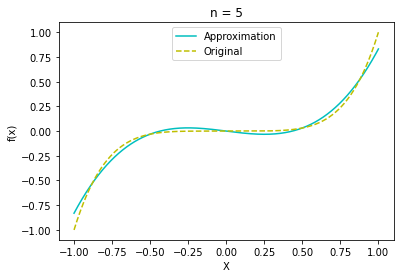

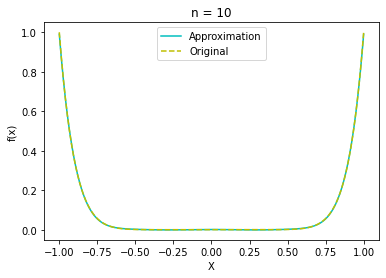

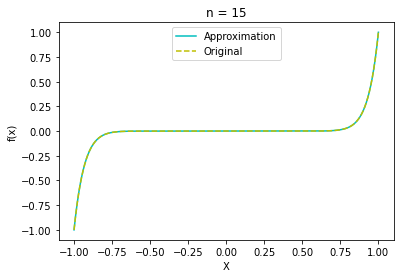

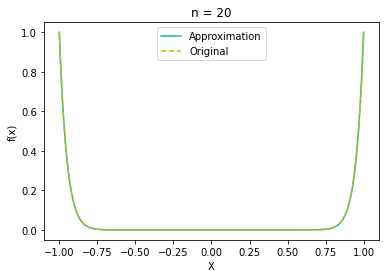

In [ ]:
# Plotting n = 5, 10, 15, 20
for n in ns_to_calc:

    coefs, cost = data2[n]

    N = max(300, 10 * n)

    X = [k/N for k in range(-N, N+1)]

    Y = [y(x, coefs) for x in X]
    Z = [x ** n for x in X]

    plt.plot(X, Y, color="c", linestyle='-', label="Approximation")
    plt.plot(X, Z, color="y", linestyle='--', label="Original")
    plt.legend(loc="upper center")
    plt.title(f"n = {n}")
    plt.xlabel("X")
    plt.ylabel("f(x)")

    plt.show()

    print()

Finished Executing for n = 2
Finished Executing for n = 3
Finished Executing for n = 4
Finished Executing for n = 5
Finished Executing for n = 6
Finished Executing for n = 7
Finished Executing for n = 8
Finished Executing for n = 9
Finished Executing for n = 10
Finished Executing for n = 11
Finished Executing for n = 12
Finished Executing for n = 13
Finished Executing for n = 14
Finished Executing for n = 15
Finished Executing for n = 16
Finished Executing for n = 17
Finished Executing for n = 18
Finished Executing for n = 19
Finished Executing for n = 20


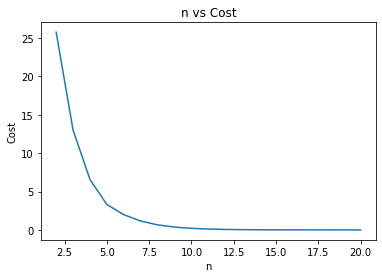

In [ ]:
# Calculating costs for different n and plotting

n_list = []
costs = []

for n in range(2, 21):
    coefs, cost = func(n, 2, False)

    print ("Finished Executing for n =", n)

    n_list.append(n)
    costs.append(cost)

plt.title("n vs Cost")
plt.plot(n_list, costs, '-')
plt.xlabel("n")
plt.ylabel("Cost")
plt.show()